In [44]:
# Data Manipulation and Linear Algebra
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

In [45]:
data = pd.read_csv("/kaggle/input/diabetes/diabetes.csv")

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [47]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


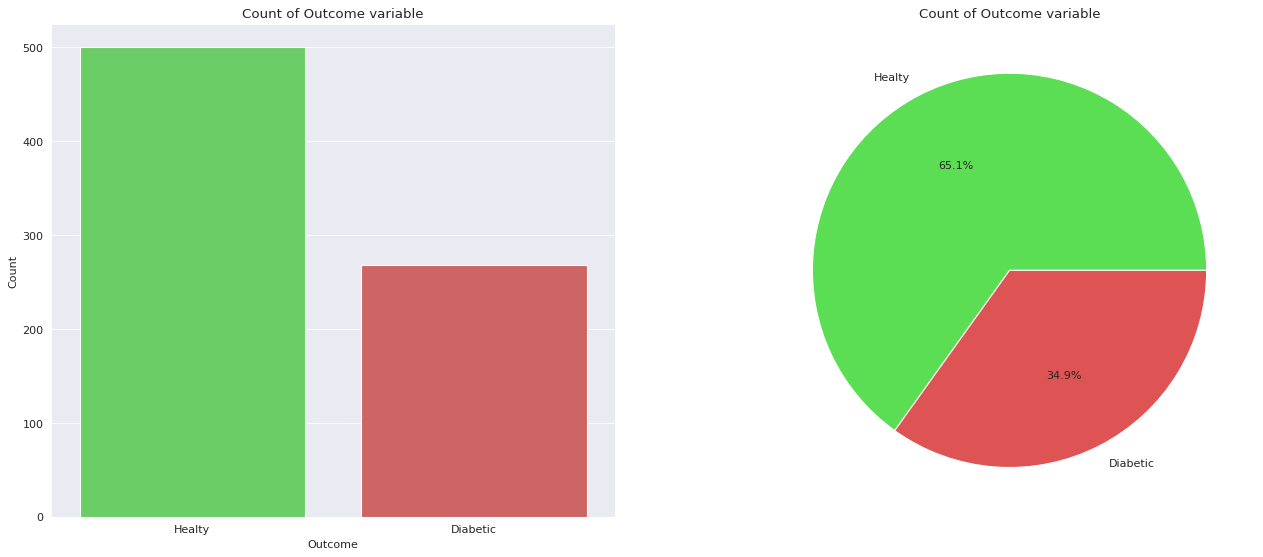

In [48]:
fig, axes = plt.subplots(figsize=(20, 8), nrows=1, ncols=2)

sns.countplot(x="Outcome", data=data, palette=['#5bde54',"#de5454"], ax=axes[0])
axes[0].set_title("Count of Outcome variable")
axes[0].set_ylabel("Count")
axes[0].set_xticklabels(["Healty", "Diabetic"])

plt.pie(data.Outcome.value_counts(), autopct='%.1f%%', labels=["Healty", "Diabetic"], colors=['#5bde54',"#de5454"])
axes[1].set_title("Count of Outcome variable")

plt.show()

In [49]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [50]:
# Replacing 0 by nan to calculate the null values
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [51]:
# Missing Values
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

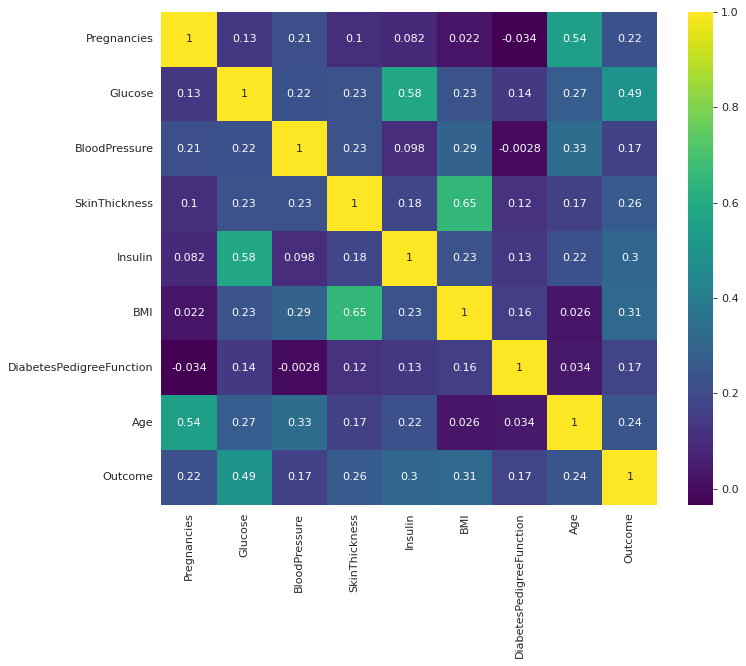

In [52]:
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["figure.dpi"] = 80
sns.heatmap(data.corr(), annot=True, cmap="viridis")
plt.show()

In [53]:
def distributon_plot(x):
    fig, axes = plt.subplots(figsize=(20, 8), nrows=1, ncols=2)

    sns.histplot(x=x, hue="Outcome", data=data, palette=['#5bde54',"#de5454"], ax=axes[0])
    axes[0].set_title(f"{x} Distribution Histplot")
    axes[0].legend(["Diabetic", "Healthy"])
    axes[0].set_ylabel("Density / Count")

    sns.kdeplot(x=x, hue="Outcome", data=data, palette=['#5bde54',"#de5454"], ax=axes[1])
    axes[1].set_title(f"{x} Distribution Kdeplot")
    axes[1].legend(["Diabetic", "Healthy"])
    axes[1].set_ylabel("Density / Count")

    plt.show()

In [54]:
# Gets two Median Valuse for Both Outcomes Seprately
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

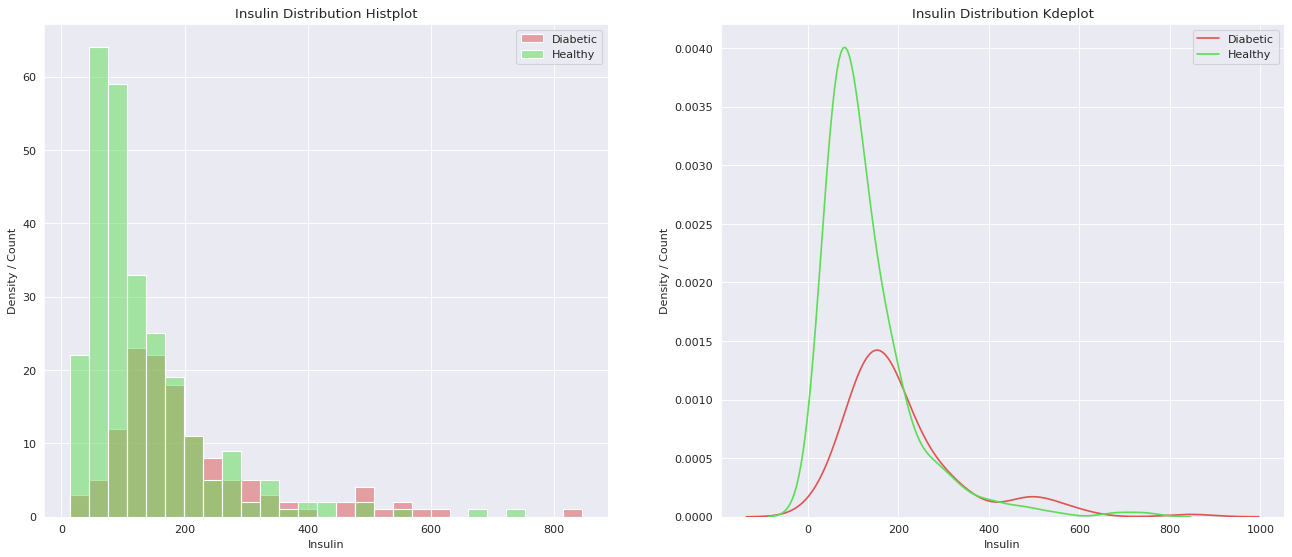

In [55]:
distributon_plot("Insulin")

In [56]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [57]:
data.loc[(data['Outcome'] == 0 ) & (data['Insulin'].isnull()), 'Insulin'] = 102.5
data.loc[(data['Outcome'] == 1 ) & (data['Insulin'].isnull()), 'Insulin'] = 169.5

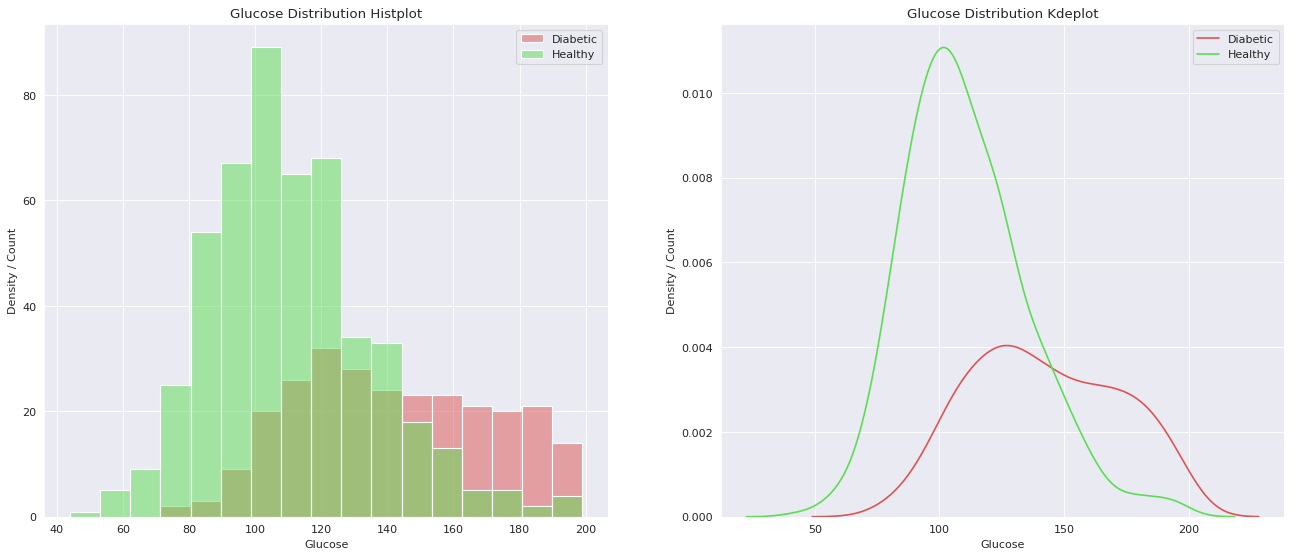

In [58]:
distributon_plot("Glucose")

In [59]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [60]:
data.loc[(data['Outcome'] == 0 ) & (data['Glucose'].isnull()), 'Glucose'] = 107
data.loc[(data['Outcome'] == 1 ) & (data['Glucose'].isnull()), 'Glucose'] = 140

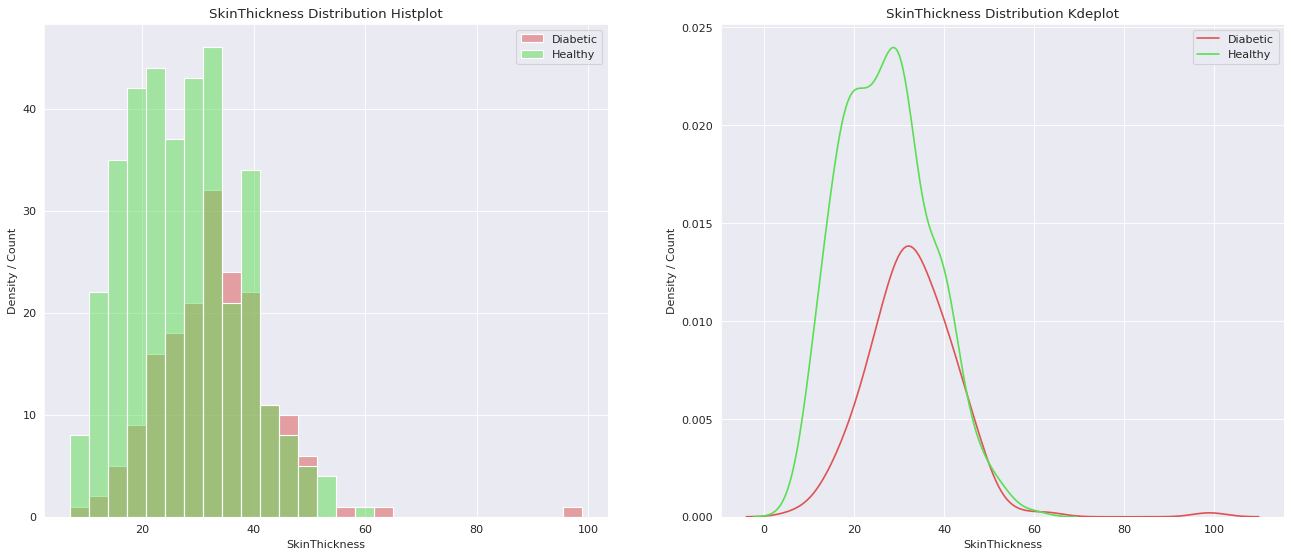

In [61]:
distributon_plot("SkinThickness")

In [62]:
median_target("SkinThickness")

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [63]:
data.loc[(data['Outcome'] == 0 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 27
data.loc[(data['Outcome'] == 1 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 32

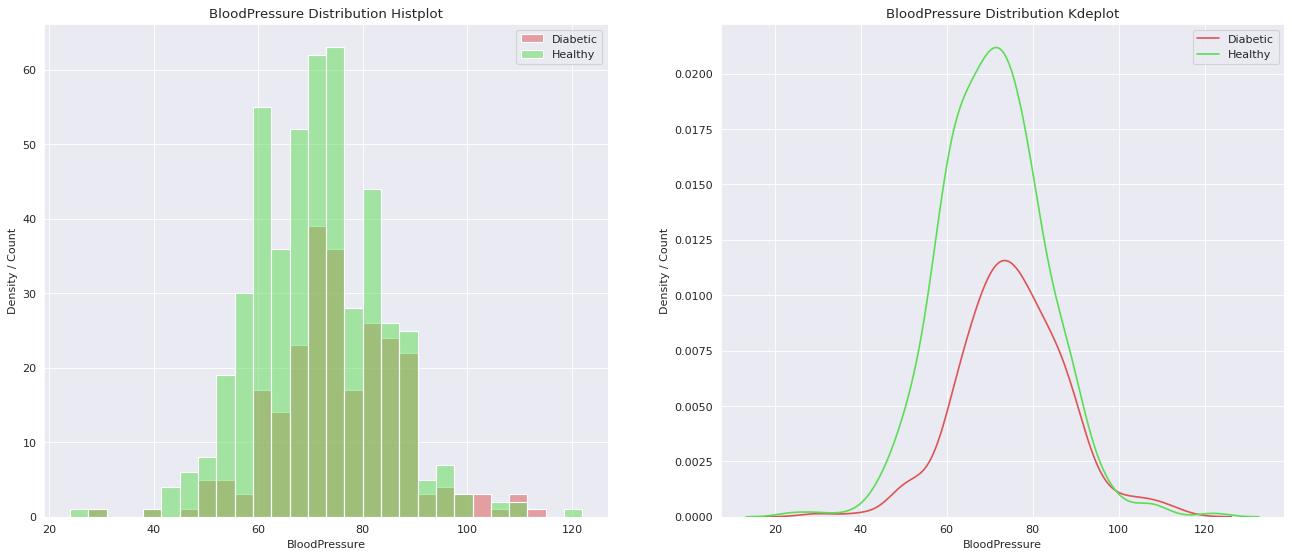

In [64]:
distributon_plot("BloodPressure")

In [65]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [66]:
data.loc[(data['Outcome'] == 0 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 70
data.loc[(data['Outcome'] == 1 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

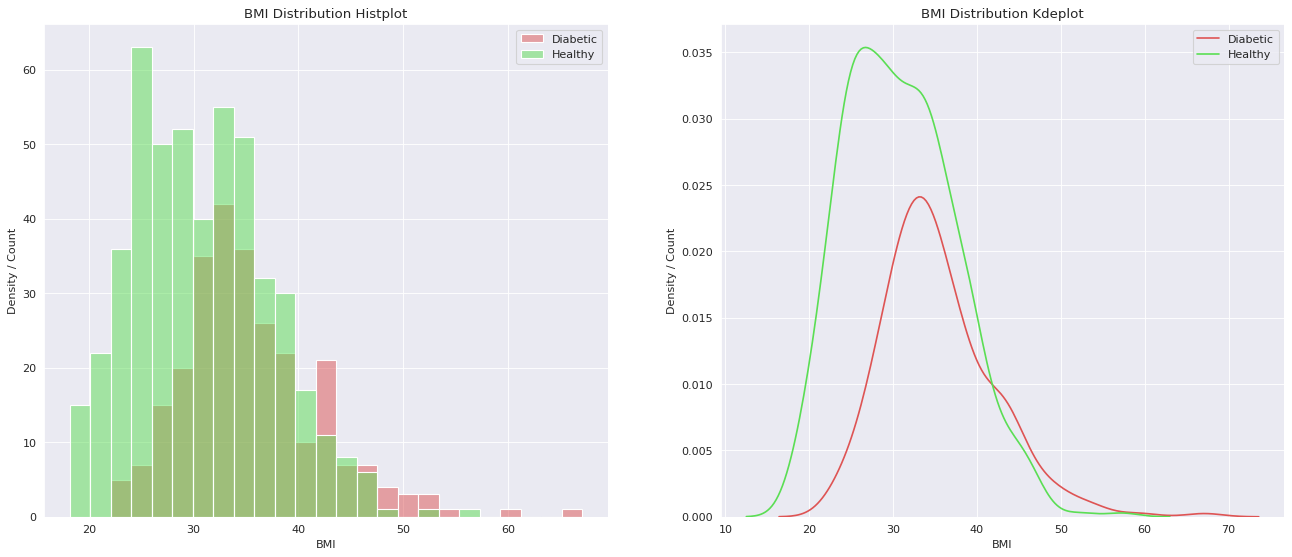

In [67]:
distributon_plot("BMI")

In [68]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [69]:
data.loc[(data['Outcome'] == 0 ) & (data['BMI'].isnull()), 'BMI'] = 30.1
data.loc[(data['Outcome'] == 1 ) & (data['BMI'].isnull()), 'BMI'] = 34.3

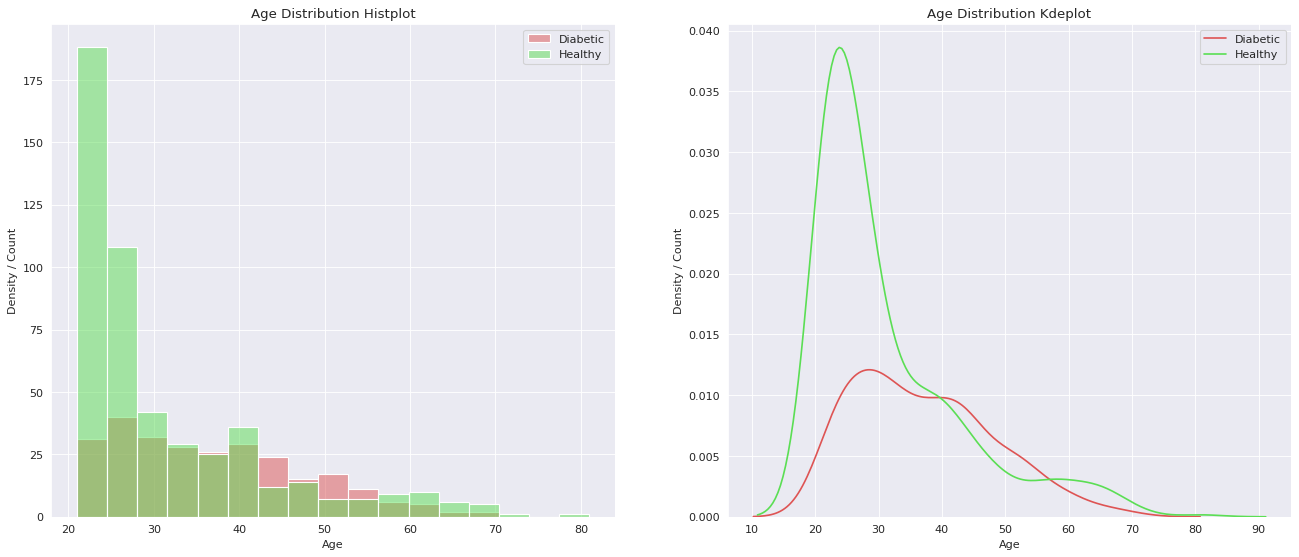

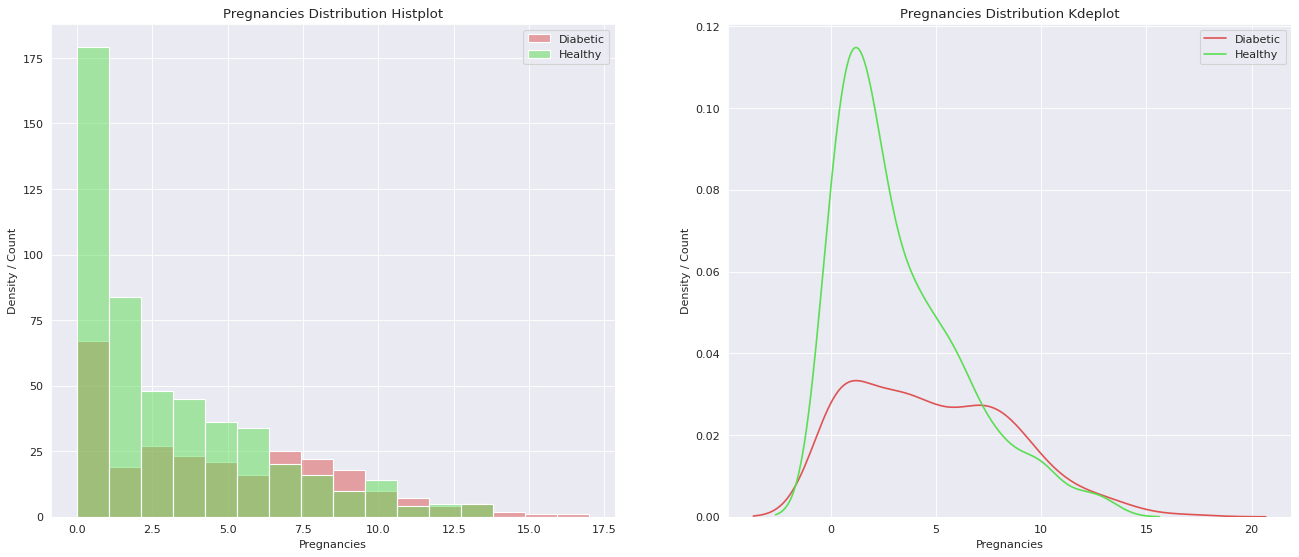

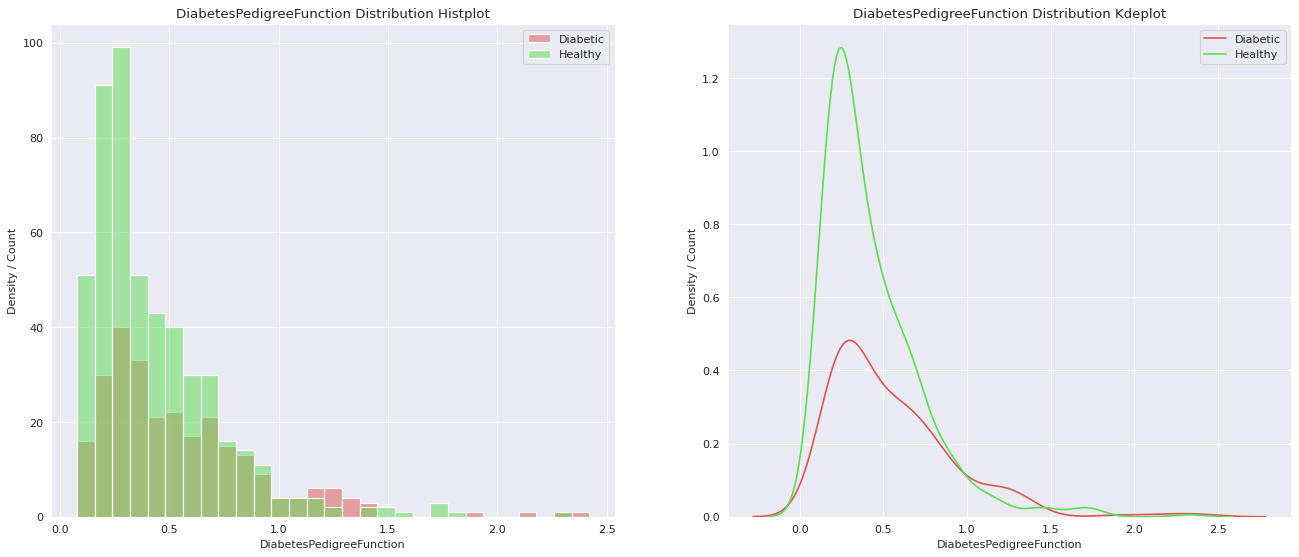

In [70]:
distributon_plot("Age")
distributon_plot("Pregnancies")
distributon_plot("DiabetesPedigreeFunction")

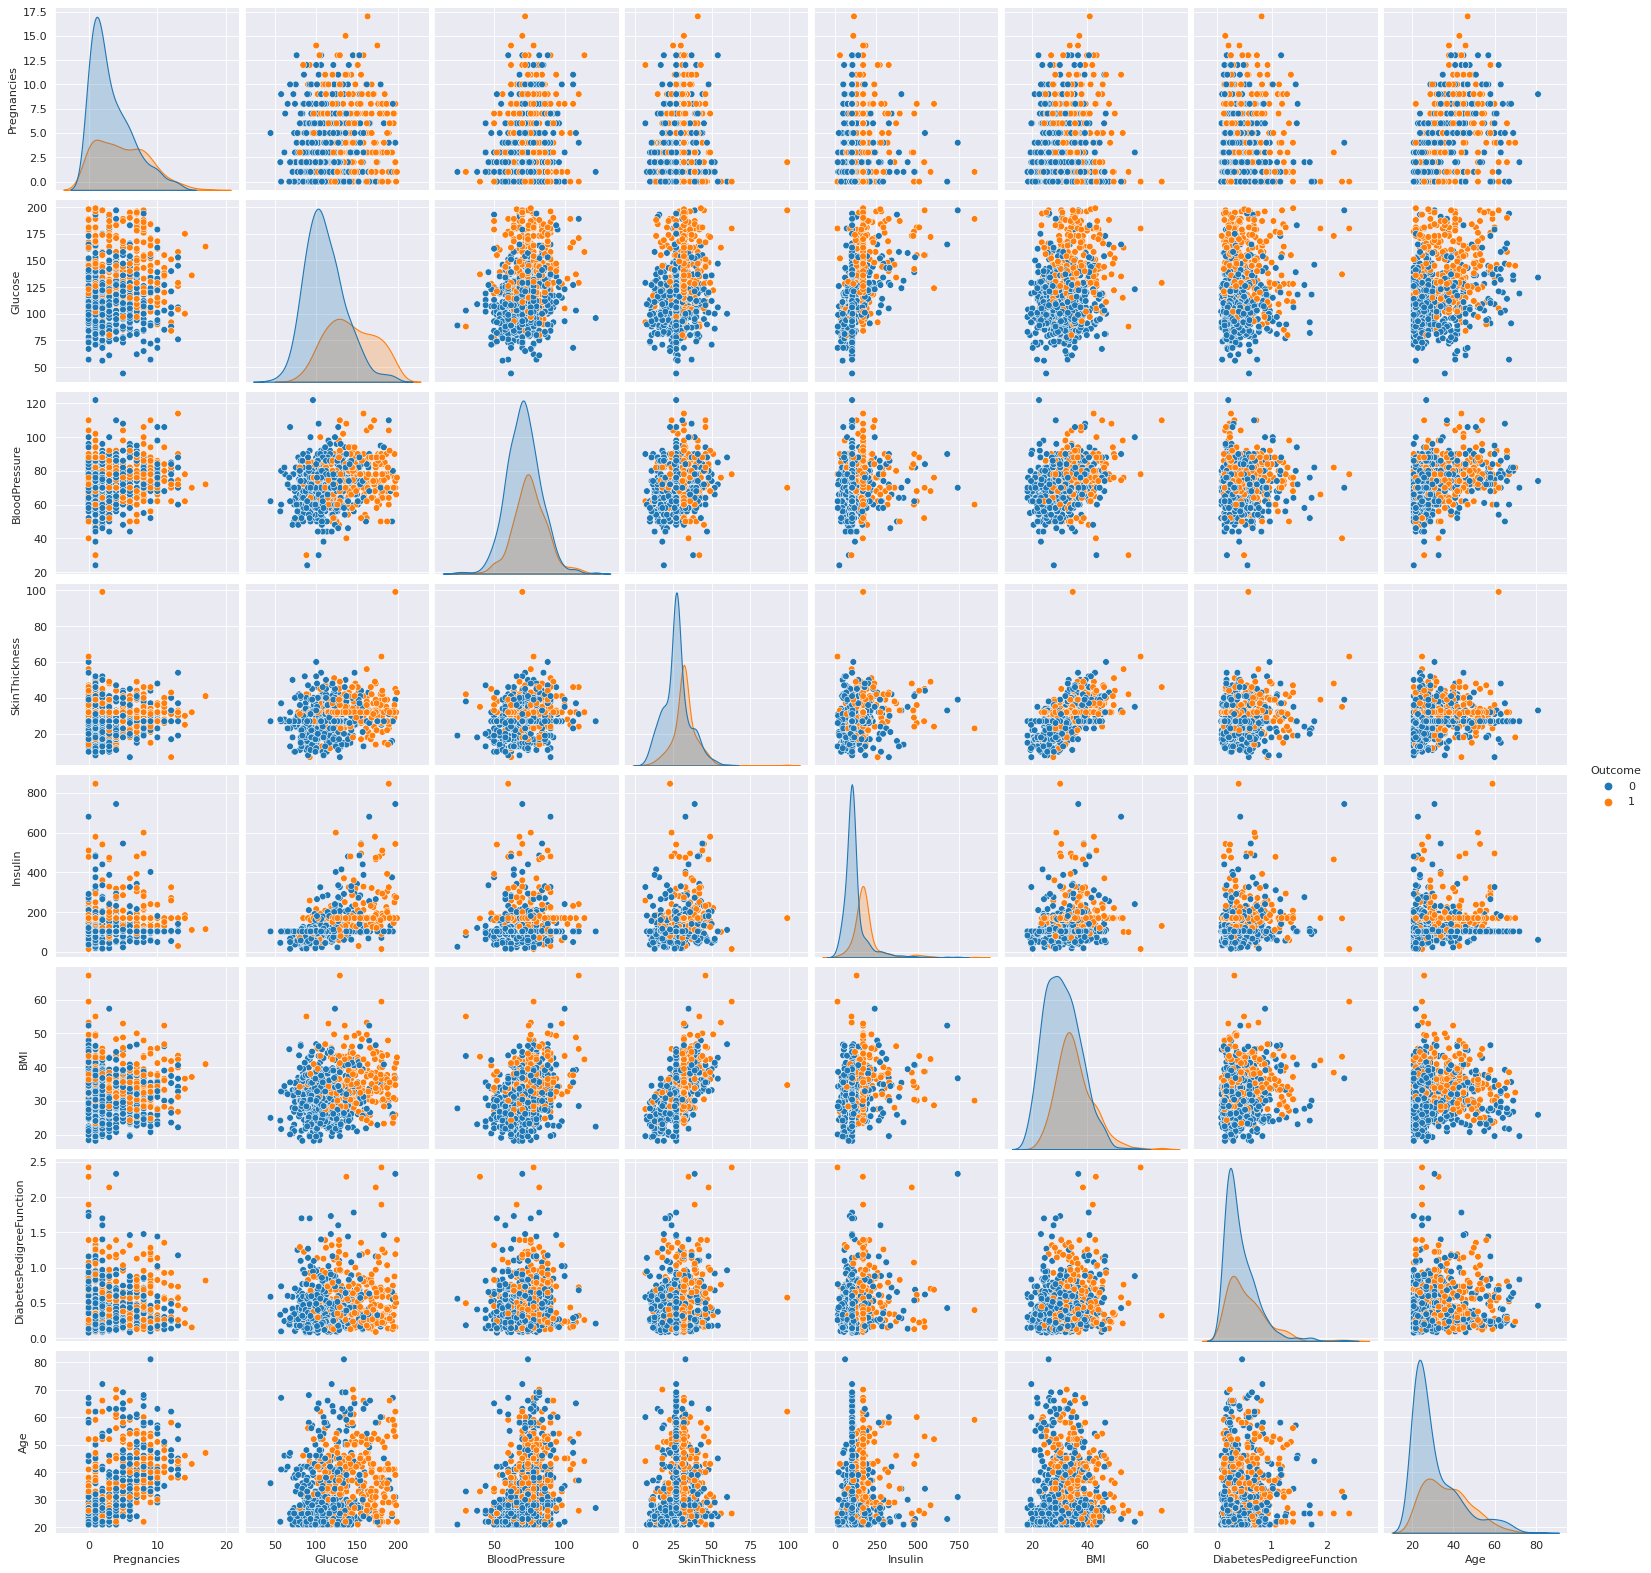

In [71]:
sns.pairplot(data, hue="Outcome")
plt.show()

In [72]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [73]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [74]:
#Feature engineering
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

data["NewBMI"] = NewBMI

data.loc[data["BMI"] < 18.5, "NewBMI"] = NewBMI[0]

data.loc[(data["BMI"] > 18.5) & (data["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
data.loc[(data["BMI"] > 24.9) & (data["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
data.loc[(data["BMI"] > 29.9) & (data["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
data.loc[(data["BMI"] > 34.9) & (data["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
data.loc[data["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]


In [75]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [76]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"  

data["NewInsulinScore"] = data.apply(set_insulin, axis=1)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [77]:
NewGlucose = pd.Series(["Low", "Normal", "Pre-diabetic", "Diabetic", "High"], dtype = "category")

data["NewGlucose"] = NewGlucose

data.loc[data["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]

data.loc[(data["Glucose"] > 70) & (data["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]

data.loc[(data["Glucose"] > 99) & (data["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]

data.loc[data["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

data.loc[data["Glucose"] > 200 ,"NewGlucose"] = NewGlucose[4]

In [78]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,Diabetic
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,Diabetic
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Diabetic


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    float64 
 2   BloodPressure             768 non-null    float64 
 3   SkinThickness             768 non-null    float64 
 4   Insulin                   768 non-null    float64 
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    int64   
 9   NewBMI                    768 non-null    category
 10  NewInsulinScore           768 non-null    object  
 11  NewGlucose                768 non-null    category
dtypes: category(2), float64(6), int64(3), object(1)
memory usage: 62.0+ KB


In [80]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
columns_encode=["NewBMI","NewInsulinScore", "NewGlucose"]
encoder = OneHotEncoder()
df_X_enumeric=data.copy()

for col in columns_encode:
  onehot = encoder.fit_transform(df_X_enumeric[[col]])
  feature_names = encoder.categories_[0]
  onehot_df = pd.DataFrame(onehot.toarray(), columns=feature_names)
  data= pd.concat([data, onehot_df], axis=1)

In [81]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,...,Obesity 2,Obesity 3,Overweight,Underweight,Abnormal,Normal,Diabetic,Low,Normal,Pre-diabetic
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    float64 
 2   BloodPressure             768 non-null    float64 
 3   SkinThickness             768 non-null    float64 
 4   Insulin                   768 non-null    float64 
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    int64   
 9   NewBMI                    768 non-null    category
 10  NewInsulinScore           768 non-null    object  
 11  NewGlucose                768 non-null    category
 12  Normal                    768 non-null    float64 
 13  Obesity 1                 768 non-null    float64 

In [83]:
categorical_df = data[['Obesity 1','Obesity 2', 'Obesity 3', 'Overweight','Underweight',
                     'Normal','Low','Normal', 'Pre-diabetic', 'Diabetic', 'Abnormal']]

In [84]:
y = data["Outcome"]
X = data.drop(["Outcome",'Obesity 1','Obesity 2', 'Obesity 3', 'Overweight','Underweight',
                     'Normal','Low','Normal', 'Pre-diabetic', 'Diabetic', 'Abnormal', 'NewBMI', 'NewInsulinScore', 'NewGlucose'], axis = 1)

In [85]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 48.1 KB


In [86]:
X_train, X_test, y_train, y_test, categorical_train, categorical_test = train_test_split(X, y, categorical_df, test_size = 0.2, random_state = 0)

In [87]:
categorical_test

,Obesity 1,Obesity 2,Obesity 3,Overweight,Underweight,Normal,Normal,Normal,Low,Normal,Normal,Normal,Pre-diabetic,Diabetic,Abnormal
661,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
122,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
113,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
14,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
529,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
482,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
230,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
527,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [88]:
X_train = pd.concat([X_train, categorical_train], axis = 1)
X_test = pd.concat([X_test, categorical_test], axis = 1)

In [89]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [90]:
# Step 3: Model Selection
model = LogisticRegression()

# Model Training
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")


Accuracy: 0.8896103896103896


In [91]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.8723404255319149


In [92]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

F1-Score: 0.8282828282828283


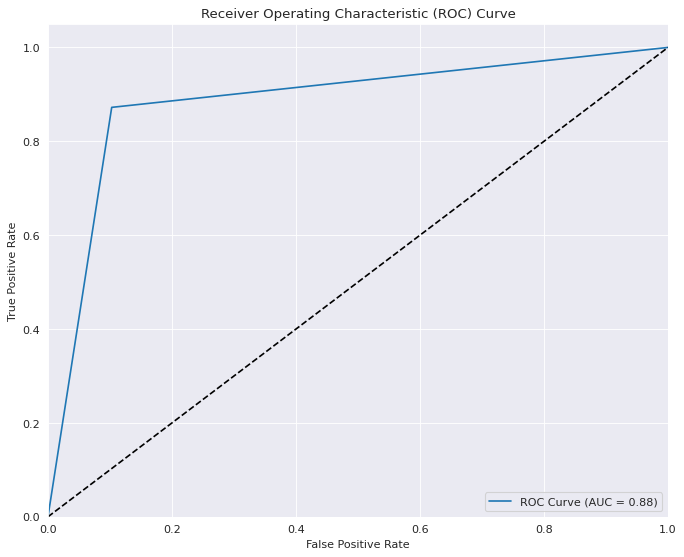

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()